<a href="https://colab.research.google.com/github/stefarine/DMML2022_ROLEX/blob/main/code/UNIL_ROLEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importation

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('training_data.csv')
df_pred = pd.read_csv('unlabelled_test_data.csv')

In [78]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [79]:
df_pred.head()
X_pred = df_pred['sentence']
X_pred

0       Nous dûmes nous excuser des propos que nous eû...
1       Vous ne pouvez pas savoir le plaisir que j'ai ...
2       Et, paradoxalement, boire froid n'est pas la b...
3       Ce n'est pas étonnant, car c'est une saison my...
4       Le corps de Golo lui-même, d'une essence aussi...
                              ...                        
1195    C'est un phénomène qui trouve une accélération...
1196    Je vais parler au serveur et voir si on peut d...
1197    Il n'était pas comme tant de gens qui par pare...
1198        Ils deviennent dangereux pour notre économie.
1199    Son succès a généré beaucoup de réactions néga...
Name: sentence, Length: 1200, dtype: object

In [ ]:
np.random.seed = 0

In [135]:
y = df['difficulty']
X = df['sentence']

0       coûts kilométriques réels diverger sensiblemen...
1                     bleu c couleur préférée n aime vert
2              test niveau français site internet l école
3                                             mari boston
4       écoles commerce couloirs places financières ar...
                              ...                        
4795    c décida remplacer habituelles portes automati...
4796    pâleurs splendides donnent chose majesté marbr...
4797       samedi mois venez rencontrer conducteurs train
4798    coûts liés journalisation n négligeables capac...
4799    sable mer haletait respiration rapide étouffée...
Name: sentence, Length: 4800, dtype: object

# Baseline

In [ ]:
base_rate = (df['difficulty'].value_counts().max()/df['difficulty'].shape[0]).round(4)
base_rate

0.1694

# Logistic Regression (whithout data cleaning)


In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [104]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
# Define classifier
classifier = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=0)


# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
################################
#WHICH AVERAGE MODE IS BETTER ?#
################################

# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(true, pred,average='macro')
    recall = recall_score(true, pred,average='macro')
    f1 = f1_score(true, pred,average='macro')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4645
	Recall: 0.4677
	F1_Score: 0.4640


In [ ]:
predictions = pipe.predict(X_pred)

predictions = pd.DataFrame(predictions,columns=['difficulty'])

predictions.to_csv("LogisticRegression.csv")

# KNN (whithout data cleaning)

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define classifier
classifier_knn = KNeighborsClassifier()

# Create pipeline
pipe_knn = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier_knn)])

# Fit model on training set
pipe_knn.fit(X_train, y_train)

# Predictions
y_pred_knn = pipe_knn.predict(X_test)

evaluate(y_test, y_pred_knn)

CONFUSION MATRIX:
[[121  28   8   1   1   2]
 [ 98  51  12   1   1   1]
 [ 81  39  33   3   1   3]
 [ 49  30  19  29   3  14]
 [ 48  36  29  15  29  16]
 [ 37  29  17  23   9  43]]
ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.4007
	Recall: 0.3183
	F1_Score: 0.3022


In [ ]:
predictions_knn = pipe_knn.predict(X_pred)

predictions_knn = pd.DataFrame(predictions_knn,columns=['difficulty'])

predictions_knn.to_csv("KNN.csv")

## KNN improved

In [ ]:
# Grid Search - hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameters to test
grid = {'n_neighbors':np.arange(1,100),
        'p':np.arange(1,3),
        'weights':['uniform','distance']}

# Define and fit model
knn = KNeighborsClassifier()
classifier_knn_plus = GridSearchCV(knn, grid, cv=10)

pipe_knn_plus = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier_knn_plus)])

pipe_knn_plus.fit(X_train, y_train)

print("Hyperparameters:", classifier_knn_plus.best_params_)

Hyperparameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [ ]:
# Predictions
y_pred_knn_plus = pipe_knn_plus.predict(X_test)

evaluate(y_test, y_pred_knn_plus)


CONFUSION MATRIX:
[[116  27  14   1   1   2]
 [ 79  64  15   4   1   1]
 [ 65  38  44   8   2   3]
 [ 37  25  23  40   2  17]
 [ 37  30  23  26  36  21]
 [ 34  22  19  13  17  53]]
ACCURACY SCORE:
0.3677
CLASSIFICATION REPORT:
	Precision: 0.4227
	Recall: 0.3678
	F1_Score: 0.3575


In [ ]:
predictions_knn_plus = pipe_knn_plus.predict(X_pred)

predictions_knn_plus = pd.DataFrame(predictions_knn_plus,columns=['difficulty'])

predictions_knn_plus.to_csv("Knn_plus.csv")

# Decision Tree Classifier (without data cleaning)

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Define classifier
classifier_dtc = DecisionTreeClassifier()

# Create pipeline
pipe_dtc = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier_dtc)])

# Fit model on training set
pipe_dtc.fit(X_train, y_train)

# Predictions
y_pred_dtc = pipe_dtc.predict(X_test)

evaluate(y_test, y_pred_dtc)

CONFUSION MATRIX:
[[82 35 25  8  2  9]
 [44 54 39 15  4  8]
 [28 38 38 23 16 17]
 [ 7 20 27 40 28 22]
 [10 19 33 36 40 35]
 [12 12 28 38 32 36]]
ACCURACY SCORE:
0.3021
CLASSIFICATION REPORT:
	Precision: 0.3021
	Recall: 0.3022
	F1_Score: 0.2994


In [ ]:
predictions_dtc = pipe_dtc.predict(X_pred)

predictions_dtc = pd.DataFrame(predictions_dtc,columns=['difficulty'])

predictions_dtc.to_csv("DecisionTreeClassifier.csv")

# Random Forest Classifier (without data cleaning)

In [ ]:
# Use random forest
from sklearn.ensemble import RandomForestClassifier

# Define classifier
classifier_rfc = RandomForestClassifier()

# Create pipeline
pipe_rfc = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier_rfc)])

# Fit model on training set
pipe_rfc.fit(X_train, y_train)

# Predictions
y_pred_rfc = pipe_rfc.predict(X_test)

evaluate(y_test, y_pred_rfc)

CONFUSION MATRIX:
[[121  22  11   4   2   1]
 [ 82  51  18  11   2   0]
 [ 35  39  54  18   7   7]
 [ 18  11  13  65  24  13]
 [ 12  10  29  52  47  23]
 [ 15  10  17  32  23  61]]
ACCURACY SCORE:
0.4156
CLASSIFICATION REPORT:
	Precision: 0.4250
	Recall: 0.4182
	F1_Score: 0.4059


In [ ]:
predictions_rfc = pipe_rfc.predict(X_pred)

predictions_rfc = pd.DataFrame(predictions_rfc,columns=['difficulty'])

predictions_rfc.to_csv("RandomForestClassifier.csv")

# Remove stopwords



In [81]:
# Install and update spaCy
!pip install -U spacy

# Download the French language model
!python -m spacy download fr

!python -m spacy download fr_core_news_sm

!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git &> /dev/null


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-12-05 16:09:13.532373: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'fr' are deprecated. Please use the
full pipeline package name 'fr_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 165 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
2022-12-05 16:09:24.133914: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.4

In [82]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('fr_core_news_sm')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
#Convert to lowercase
df['sentence'] = df['sentence'].str.lower()

# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

# Remove punctuation
df['sentence'] = df['sentence'].apply(remove_punctuations)
df.head()

,id,sentence,difficulty
0,0,les coûts kilométriques réels peuvent diverger...,C1
1,1,le bleu c est ma couleur préférée mais je n a...,A1
2,2,le test de niveau en français est sur le site ...,A1
3,3,est ce que ton mari est aussi de boston,A1
4,4,dans les écoles de commerce dans les couloirs...,B1


In [84]:
#Define list of stopwords

french_stopwords = spacy.lang.fr.stop_words.STOP_WORDS

In [85]:
#Remove stopwords
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (french_stopwords)]))
df.head(10)

,id,sentence,difficulty
0,0,coûts kilométriques réels diverger sensiblemen...,C1
1,1,bleu c couleur préférée n aime vert,A1
2,2,test niveau français site internet l école,A1
3,3,mari boston,A1
4,4,écoles commerce couloirs places financières ar...,B1
5,5,histoire j beaucoup aimée,A2
6,6,médecins disent qu boire verre vin rouge repas,A2
7,7,particulièrement observé personnes besoin popu...,B2
8,8,j retrouvé plaisir manger oeuf coque,A2
9,9,bien habitons petite maison ancienne beau jardin,B1


In [88]:
#tokenize
nlp = spacy.load('fr_core_news_sm')

df['tocken_without_stopwords'] = [nlp(text) for text in df.sentence]
df.head()

,id,sentence,difficulty,tocken_without_stopwords,len
0,0,coûts kilométriques réels diverger sensiblemen...,C1,"(coûts, kilométriques, réels, diverger, sensib...",23
1,1,bleu c couleur préférée n aime vert,A1,"(bleu, c, couleur, préférée, n, aime, vert)",7
2,2,test niveau français site internet l école,A1,"(test, niveau, français, site, internet, l, éc...",7
3,3,mari boston,A1,"(mari, boston)",2
4,4,écoles commerce couloirs places financières ar...,B1,"(écoles, commerce, couloirs, places, financièr...",22


In [89]:
#add a columns with the lengh 
df['len'] = [len(token) for token in df.tocken_without_stopwords]
df.head()

,id,sentence,difficulty,tocken_without_stopwords,len
0,0,coûts kilométriques réels diverger sensiblemen...,C1,"(coûts, kilométriques, réels, diverger, sensib...",23
1,1,bleu c couleur préférée n aime vert,A1,"(bleu, c, couleur, préférée, n, aime, vert)",7
2,2,test niveau français site internet l école,A1,"(test, niveau, français, site, internet, l, éc...",7
3,3,mari boston,A1,"(mari, boston)",2
4,4,écoles commerce couloirs places financières ar...,B1,"(écoles, commerce, couloirs, places, financièr...",22


#Stemming

In [90]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

In [91]:
df['stemmed'] = [return_stem(text) for text in df.sentence]


In [92]:
df.head()

,id,sentence,difficulty,tocken_without_stopwords,len,stemmed
0,0,coûts kilométriques réels diverger sensiblemen...,C1,"(coûts, kilométriques, réels, diverger, sensib...",23,"[coût, kilometr, réel, diverg, sensibl, valeur..."
1,1,bleu c couleur préférée n aime vert,A1,"(bleu, c, couleur, préférée, n, aime, vert)",7,"[bleu, c, couleur, préfer, n, aim, vert]"
2,2,test niveau français site internet l école,A1,"(test, niveau, français, site, internet, l, éc...",7,"[test, niveau, franc, sit, internet, l, écol]"
3,3,mari boston,A1,"(mari, boston)",2,"[mar, boston]"
4,4,écoles commerce couloirs places financières ar...,B1,"(écoles, commerce, couloirs, places, financièr...",22,"[écol, commerc, couloir, plac, financi, arriv,..."


# TEST TEST

In [147]:
def list_to_text(text):
  res = ''
  for e in text:
    res.join(e)
  return res

In [148]:
y = df['difficulty']
X = df['stemmed']


df['stmd'] = [list_to_text(text) for text in df.stemmed]


In [149]:
df

,id,sentence,difficulty,tocken_without_stopwords,len,stemmed,stmd
0,0,coûts kilométriques réels diverger sensiblemen...,C1,"(coûts, kilométriques, réels, diverger, sensib...",23,"[coût, kilometr, réel, diverg, sensibl, valeur...",
1,1,bleu c couleur préférée n aime vert,A1,"(bleu, c, couleur, préférée, n, aime, vert)",7,"[bleu, c, couleur, préfer, n, aim, vert]",
2,2,test niveau français site internet l école,A1,"(test, niveau, français, site, internet, l, éc...",7,"[test, niveau, franc, sit, internet, l, écol]",
3,3,mari boston,A1,"(mari, boston)",2,"[mar, boston]",
4,4,écoles commerce couloirs places financières ar...,B1,"(écoles, commerce, couloirs, places, financièr...",22,"[écol, commerc, couloir, plac, financi, arriv,...",
...,...,...,...,...,...,...,...
4795,4795,c décida remplacer habituelles portes automati...,B2,"(c, décida, remplacer, habituelles, portes, au...",13,"[c, décid, remplac, habituel, port, automat, p...",
4796,4796,pâleurs splendides donnent chose majesté marbr...,C1,"(pâleurs, splendides, donnent, chose, majesté,...",9,"[pâleur, splendid, donnent, chos, majest, marb...",
4797,4797,samedi mois venez rencontrer conducteurs train,A2,"(samedi, mois, venez, rencontrer, conducteurs,...",6,"[samed, mois, ven, rencontr, conducteur, train]",
4798,4798,coûts liés journalisation n négligeables capac...,C2,"(coûts, liés, journalisation, n, négligeables,...",19,"[coût, li, journalis, n, néglige, capac, mémoi...",


In [118]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('fr_core_news_sm')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
#Convert to lowercase
df_pred['sentence'] = df_pred['sentence'].str.lower()

# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

# Remove punctuation
df_pred['sentence'] = df_pred['sentence'].apply(remove_punctuations)
df_pred.head()

,id,sentence,tocken_without_stopwords,len,stemmed
0,0,dûmes excuser propos eûmes prononcés,"(dûmes, excuser, propos, eûmes, prononcés)",5,"[dûm, excus, propos, eûm, prononc]"
1,1,pouvez savoir plaisir j recevoir bonne nouvelle,"(pouvez, savoir, plaisir, j, recevoir, bonne, ...",7,"[pouv, savoir, plais, j, recevoir, bon, nouvel]"
2,2,paradoxalement boire froid n bonne parade,"(paradoxalement, boire, froid, n, bonne, parade)",6,"[paradoxal, boir, froid, n, bon, parad]"
3,3,n étonnant c saison mystérieuse,"(n, étonnant, c, saison, mystérieuse)",5,"[n, éton, c, saison, mystéri]"
4,4,corps golo d essence surnaturelle monture s ar...,"(corps, golo, d, essence, surnaturelle, montur...",37,"[corp, golo, d, essenc, surnaturel, montur, s,..."


In [120]:
#Define list of stopwords

french_stopwords = spacy.lang.fr.stop_words.STOP_WORDS

In [121]:
#Remove stopwords
df_pred['sentence'] = df_pred['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (french_stopwords)]))
df_pred.head(10)

,id,sentence,tocken_without_stopwords,len,stemmed
0,0,dûmes excuser propos eûmes prononcés,"(dûmes, excuser, propos, eûmes, prononcés)",5,"[dûm, excus, propos, eûm, prononc]"
1,1,pouvez savoir plaisir j recevoir bonne nouvelle,"(pouvez, savoir, plaisir, j, recevoir, bonne, ...",7,"[pouv, savoir, plais, j, recevoir, bon, nouvel]"
2,2,paradoxalement boire froid n bonne parade,"(paradoxalement, boire, froid, n, bonne, parade)",6,"[paradoxal, boir, froid, n, bon, parad]"
3,3,n étonnant c saison mystérieuse,"(n, étonnant, c, saison, mystérieuse)",5,"[n, éton, c, saison, mystéri]"
4,4,corps golo d essence surnaturelle monture s ar...,"(corps, golo, d, essence, surnaturelle, montur...",37,"[corp, golo, d, essenc, surnaturel, montur, s,..."
5,5,jeta cri petit cri voulut dresser débattre rep...,"(jeta, cri, petit, cri, voulut, dresser, débat...",13,"[jet, cri, pet, cri, voulut, dress, débattr, r..."
6,6,madame monsieur fils léo arrive jours retard l...,"(madame, monsieur, fils, léo, arrive, jours, r...",9,"[madam, monsieur, fil, léo, arriv, jour, retar..."
7,7,trouvé repas midi,"(trouvé, repas, midi)",3,"[trouv, rep, mid]"
8,8,racine mal bel bien penser tendant manichéisme...,"(racine, mal, bel, bien, penser, tendant, mani...",21,"[racin, mal, bel, bien, pens, tend, maniché, n..."
9,9,madame,(madame),1,[madam]


In [122]:
#tokenize
nlp = spacy.load('fr_core_news_sm')

df_pred['tocken_without_stopwords'] = [nlp(text) for text in df_pred.sentence]
df_pred.head()

,id,sentence,tocken_without_stopwords,len,stemmed
0,0,dûmes excuser propos eûmes prononcés,"(dûmes, excuser, propos, eûmes, prononcés)",5,"[dûm, excus, propos, eûm, prononc]"
1,1,pouvez savoir plaisir j recevoir bonne nouvelle,"(pouvez, savoir, plaisir, j, recevoir, bonne, ...",7,"[pouv, savoir, plais, j, recevoir, bon, nouvel]"
2,2,paradoxalement boire froid n bonne parade,"(paradoxalement, boire, froid, n, bonne, parade)",6,"[paradoxal, boir, froid, n, bon, parad]"
3,3,n étonnant c saison mystérieuse,"(n, étonnant, c, saison, mystérieuse)",5,"[n, éton, c, saison, mystéri]"
4,4,corps golo d essence surnaturelle monture s ar...,"(corps, golo, d, essence, surnaturelle, montur...",37,"[corp, golo, d, essenc, surnaturel, montur, s,..."


In [123]:
#add a columns with the lengh 
df_pred['len'] = [len(token) for token in df_pred.tocken_without_stopwords]
df_pred.head()

,id,sentence,tocken_without_stopwords,len,stemmed
0,0,dûmes excuser propos eûmes prononcés,"(dûmes, excuser, propos, eûmes, prononcés)",5,"[dûm, excus, propos, eûm, prononc]"
1,1,pouvez savoir plaisir j recevoir bonne nouvelle,"(pouvez, savoir, plaisir, j, recevoir, bonne, ...",7,"[pouv, savoir, plais, j, recevoir, bon, nouvel]"
2,2,paradoxalement boire froid n bonne parade,"(paradoxalement, boire, froid, n, bonne, parade)",6,"[paradoxal, boir, froid, n, bon, parad]"
3,3,n étonnant c saison mystérieuse,"(n, étonnant, c, saison, mystérieuse)",5,"[n, éton, c, saison, mystéri]"
4,4,corps golo d essence surnaturelle monture s ar...,"(corps, golo, d, essence, surnaturelle, montur...",37,"[corp, golo, d, essenc, surnaturel, montur, s,..."


In [124]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')

def return_stem(sentence):
    doc = nlp(sentence)
    return [stemmer.stem(X.text) for X in doc]

In [125]:
df_pred['stemmed'] = [return_stem(text) for text in df_pred.sentence]


In [126]:
df_pred.head()

,id,sentence,tocken_without_stopwords,len,stemmed
0,0,dûmes excuser propos eûmes prononcés,"(dûmes, excuser, propos, eûmes, prononcés)",5,"[dûm, excus, propos, eûm, prononc]"
1,1,pouvez savoir plaisir j recevoir bonne nouvelle,"(pouvez, savoir, plaisir, j, recevoir, bonne, ...",7,"[pouv, savoir, plais, j, recevoir, bon, nouvel]"
2,2,paradoxalement boire froid n bonne parade,"(paradoxalement, boire, froid, n, bonne, parade)",6,"[paradoxal, boir, froid, n, bon, parad]"
3,3,n étonnant c saison mystérieuse,"(n, étonnant, c, saison, mystérieuse)",5,"[n, éton, c, saison, mystéri]"
4,4,corps golo d essence surnaturelle monture s ar...,"(corps, golo, d, essence, surnaturelle, montur...",37,"[corp, golo, d, essenc, surnaturel, montur, s,..."


In [127]:
X_pred = df_pred['stemmed']

In [128]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1))

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [133]:
X_train.head()

,stemmed
70,"[t, appel]"
4347,"[natur, simplifi, sensibl, débat, controvers]"
1122,"[pèlerin, partag, célebr, voisin, indien, appo..."
4570,"[qu, fait]"
34,"[obscur, devenon, maîtr, biospher, devenon, dé..."


In [111]:
# Define classifier
classifier = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=0)


# Create pipeline
## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

AttributeError: ignored

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
predictions = pipe.predict(X_pred)

predictions = pd.DataFrame(predictions,columns=['difficulty'])

predictions.to_csv("LogisticRegression.csv")

# Classification using Doc2Vec and Logistic Regression [test]

**/!\ IL FAUT CLEAN CETTE SECTION, C'est des tests

https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


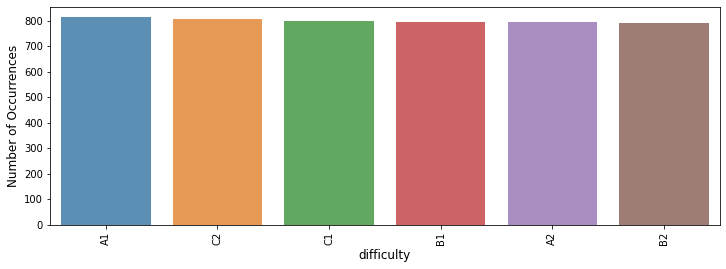

In [ ]:
cnt_pro = df['difficulty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('difficulty', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['sentence'] = df['sentence'].apply(cleanText)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['sentence']), tags=[r.difficulty]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['sentence']), tags=[r.difficulty]), axis=1)

In [ ]:
train_tagged.values[30]


TaggedDocument(words=['je', 'vais', 'revenir', 'avec', 'les', 'enfants', 'la', 'semaine', 'prochaine'], tags=['a1'])

In [ ]:
xx = pd.DataFrame(X_pred)

In [ ]:
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['sentence']), tags=[r.difficulty]), axis=1)

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 3840/3840 [00:00<00:00, 934284.32it/s]


In [ ]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 3840/3840 [00:00<00:00, 1492413.58it/s]


CPU times: user 9.62 s, sys: 1 s, total: 10.6 s
Wall time: 8.6 s


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors


In [ ]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred

array(['c2', 'c1', 'b1', 'c2', 'a1', 'a1', 'a2', 'b1', 'a2', 'a1', 'a1',
       'a1', 'c1', 'a2', 'a1', 'a2', 'c1', 'b2', 'a2', 'a1', 'b1', 'b1',
       'a2', 'c2', 'b2', 'b2', 'b2', 'b2', 'c1', 'c2', 'b2', 'b1', 'b2',
       'a2', 'a1', 'b1', 'c2', 'a2', 'b2', 'a1', 'b2', 'a2', 'b1', 'a1',
       'c2', 'b1', 'b1', 'c1', 'c1', 'c2', 'c2', 'a2', 'b2', 'a1', 'c2',
       'c1', 'b2', 'a2', 'c2', 'c2', 'a2', 'c2', 'c1', 'b1', 'b2', 'a2',
       'b1', 'b2', 'c1', 'a1', 'c2', 'a1', 'c2', 'c1', 'a1', 'b2', 'b2',
       'c1', 'b2', 'b2', 'b1', 'a1', 'c2', 'b1', 'b2', 'c1', 'a2', 'b1',
       'a1', 'a2', 'c2', 'b2', 'c2', 'c2', 'a2', 'b2', 'c1', 'b2', 'a1',
       'c2', 'c1', 'b1', 'c2', 'b1', 'a1', 'a1', 'a1', 'a1', 'c2', 'c1',
       'b2', 'c2', 'a1', 'a1', 'b2', 'b2', 'a2', 'c2', 'c1', 'a2', 'b1',
       'c2', 'a1', 'a1', 'a1', 'c2', 'c1', 'a1', 'b1', 'b1', 'a1', 'b2',
       'a1', 'a1', 'b1', 'a1', 'a2', 'b2', 'a2', 'c2', 'c2', 'b2', 'b2',
       'c1', 'c2', 'b1', 'c2', 'b2', 'a1', 'c2', 'a

In [ ]:
predictions_rfc.to_csv("Doc2Vec_AndLogisticRegression.csv")

# PyTorch [test]

In [ ]:
df.head()

,id,sentence,difficulty
0,0,les coûts kilométriques réels peuvent diverger...,c1
1,1,"le bleu, c'est ma couleur préférée mais je n'a...",a1
2,2,le test de niveau en français est sur le site ...,a1
3,3,est-ce que ton mari est aussi de boston?,a1
4,4,"dans les écoles de commerce, dans les couloirs...",b1


In [ ]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.243480,0.067973,-0.240311,-0.171249,0.203106,-0.761354,-0.046165,-1.549285,0.337967,0.407008,...,0.161163,0.549034,0.452843,0.170946,0.155398,-0.002765,-0.070860,-0.425613,-0.126733,1.126192
1,1.171847,0.048078,-0.225212,-0.166444,0.193179,-0.716439,-0.063947,-1.469329,0.325881,0.375107,...,0.175351,0.526935,0.432997,0.152903,0.137189,0.001789,-0.050718,-0.409698,-0.125014,1.077507
2,1.232715,0.065573,-0.228219,-0.173022,0.203256,-0.747198,-0.046779,-1.527806,0.339857,0.398824,...,0.164503,0.546861,0.452240,0.162488,0.157259,-0.006597,-0.074214,-0.417663,-0.120035,1.125511
3,1.187973,0.017426,-0.226786,-0.164666,0.185343,-0.723949,-0.100096,-1.501035,0.341394,0.383948,...,0.191436,0.554266,0.432888,0.147553,0.131971,0.011552,-0.034115,-0.412308,-0.125970,1.105721
4,1.184072,0.046448,-0.231060,-0.160180,0.188369,-0.731148,-0.067227,-1.490384,0.330142,0.388071,...,0.166180,0.531129,0.429252,0.161053,0.140049,0.002687,-0.051093,-0.407068,-0.125743,1.077015


In [ ]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.172521,0.007317,-0.033947,-0.022008,0.028568,-0.106558,-0.011694,-0.219836,0.046736,0.054057,...,0.028440,0.074153,0.065257,0.024767,0.022181,0.002793,-0.002709,-0.059150,-0.020346,0.149708
1,1.188329,0.047493,-0.228093,-0.168842,0.193776,-0.721533,-0.058406,-1.484395,0.322863,0.388092,...,0.161957,0.553111,0.436492,0.153738,0.136666,0.004793,-0.070784,-0.415280,-0.118244,1.117308
2,1.204904,0.054210,-0.241789,-0.177093,0.196845,-0.743322,-0.057211,-1.513076,0.332885,0.386060,...,0.165514,0.536303,0.441763,0.158690,0.134921,-0.002078,-0.055881,-0.420673,-0.134469,1.113140
3,1.008607,0.064613,-0.197738,-0.142501,0.173021,-0.617723,-0.021723,-1.259182,0.269116,0.323753,...,0.129124,0.436304,0.374386,0.141306,0.122832,-0.002955,-0.056481,-0.352449,-0.109558,0.915486
4,1.241253,0.027136,-0.222274,-0.183277,0.188977,-0.751949,-0.095720,-1.550330,0.375736,0.404486,...,0.188612,0.557111,0.439316,0.145463,0.161129,-0.009478,-0.052400,-0.400724,-0.120322,1.128814


In [ ]:
# saving max, min for each column
maxs, mins = dict(), dict()

In [ ]:
for col in X_train:
    maxs[col] = X_train[col].max()
    mins[col] = X_train[col].min()

In [ ]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.133607,0.204362,0.878336,0.884757,0.126528,0.866422,0.704011,0.862564,0.123178,0.124963,...,0.166110,0.124826,0.139014,0.130593,0.116080,0.595380,0.948611,0.866201,0.863793,0.129293
1,0.914171,0.502139,0.183834,0.162392,0.854716,0.101258,0.376233,0.077903,0.839864,0.874992,...,0.804342,0.935648,0.916878,0.775928,0.678266,0.628772,0.247833,0.078536,0.246985,0.959223
2,0.926908,0.551928,0.134842,0.121804,0.868242,0.074147,0.384618,0.060107,0.865877,0.870431,...,0.821345,0.907194,0.927921,0.800707,0.669695,0.514020,0.401243,0.066608,0.144766,0.955649
3,0.776070,0.629035,0.292420,0.291980,0.763231,0.230420,0.633637,0.217649,0.700363,0.730529,...,0.647395,0.737907,0.786745,0.713719,0.610331,0.499377,0.395068,0.217500,0.301715,0.786117
4,0.954839,0.351260,0.204652,0.091379,0.833560,0.063413,0.114399,0.036991,0.977095,0.911804,...,0.931760,0.942419,0.922795,0.734519,0.798393,0.390439,0.437080,0.110729,0.233894,0.969092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0.926255,0.437663,0.210326,0.168720,0.838458,0.089606,0.261911,0.065949,0.898312,0.891345,...,0.870426,0.924067,0.918063,0.774201,0.736522,0.537937,0.361950,0.097579,0.256669,0.948183
3836,0.933567,0.595462,0.185439,0.173806,0.865360,0.080078,0.455399,0.064645,0.871343,0.906066,...,0.777157,0.918390,0.925033,0.827263,0.775402,0.447822,0.206757,0.099236,0.272942,0.946940
3837,0.961073,0.700596,0.168673,0.136605,0.917198,0.052643,0.494603,0.038130,0.903026,0.899143,...,0.838085,0.905444,0.960919,0.851065,0.824383,0.380485,0.262322,0.058587,0.194918,0.958812
3838,0.931953,0.405929,0.159524,0.158841,0.846822,0.076733,0.214475,0.053619,0.888031,0.896719,...,0.858766,0.950409,0.925696,0.789165,0.690960,0.649341,0.409417,0.076335,0.209150,0.971139


In [ ]:
import torch
import torch.nn as nn

In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float)


TypeError: ignored

In [ ]:
y_train = pd.DataFrame(y_train)


In [ ]:
y_train

yo = pd.DataFrame(columns=['0'])

for y in y_train[0]:
  y = y.replace("a","1")
  y = y.replace("b","2")
  y = y.replace("c","3")
  yo = yo.append({'0' : int(y)},ignore_index=True)

yo.dtypes

yo = yo['0'].astype(int)

yo.dtypes

dtype('int64')

In [ ]:
yo

,0
0,a1
1,b2
2,c1
3,a1
4,c2
...,...
3835,b2
3836,a2
3837,c1
3838,b2


In [ ]:
y_train = torch.tensor(yo.values, dtype=torch.float)


In [ ]:
print(X_train.size(), y_train.size())


torch.Size([3840, 300]) torch.Size([3840])


In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, D_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, D_out)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        y_pred = self.activation(self.linear1(x))
        y_pred = self.linear2(y_pred)
        return y_pred

In [ ]:
D_in, D_out = X_train.shape[1], y_train.shape[0]


In [ ]:
model1 = Net(D_in, 500, D_out)


In [ ]:
# MSE loss
criterion = nn.MSELoss(reduction='sum')
# SGD optimizer for finding the weights of the network
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-4)

In [ ]:
# we need to normalize the test data with the min and max value
# from the training data
for col in X_test.columns:
    X_test[col] = (X_test[col] - mins[col]) / (maxs[col] - mins[col])


In [ ]:
# normalize the test data 
y_test_df = pd.DataFrame(y_test["difficulty"])
y_test = torch.tensor(y_test_df.values, dtype=torch.float)


TypeError: ignored